<a href="https://colab.research.google.com/github/sreeramreddy68/Machine-Learning/blob/main/Prob_and_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [3]:
def toss_coin(number_of_tosses=100):
  return pd.Series(np.random.choice(['Heads','Tails'],number_of_tosses))
def throw_dice(number_of_tosses=100):
  return pd.Series(np.random.randint(1,6+1,number_of_tosses))
result=toss_coin()
print(result.value_counts())
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values
                        )])
fig.show()

Tails    53
Heads    47
Name: count, dtype: int64


In [4]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values
                        )])
fig.show()

In [5]:
result=pd.Series([np.sum(toss_coin(500)=='Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values
                        )])
fig.show()

In [6]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [7]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

13 cards were thrown: JD 6C 10S 8C 5D 10D 4D 6D 5C 10H 5H QC 3S AD
2 cards were thrown: 6H 7D AC
3 cards were thrown: 9S QD 7C AS
20 cards were thrown: 7D 9C 2C 8H 9D KD 4H JS 4S JD QD 3H 10C 5C 9H 5S 8S 9S 5H 2H AH
6 cards were thrown: 9S KS 8S 10S 8D 8H AD
6 cards were thrown: 3H JD 4H 2D 2C KS AD
30 cards were thrown: 4H QC 8H JS 6C 10D 9H 10C KH QS 6S KC 2D 10S JH 2S 8S KS 7H 2H 5H 7D QH 8D 8C 3C QD 4D JD 3D AS
7 cards were thrown: 8D KH 5H 4S 6D 2S QC AS
11 cards were thrown: KH QD 3C 6D 3H 5C KC 4H 5D 8C 2S AS
7 cards were thrown: 10C 8D 9H 6S 6D 5S 10H AH

9.6289 cards are tossed before we see the first ace!


In [8]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

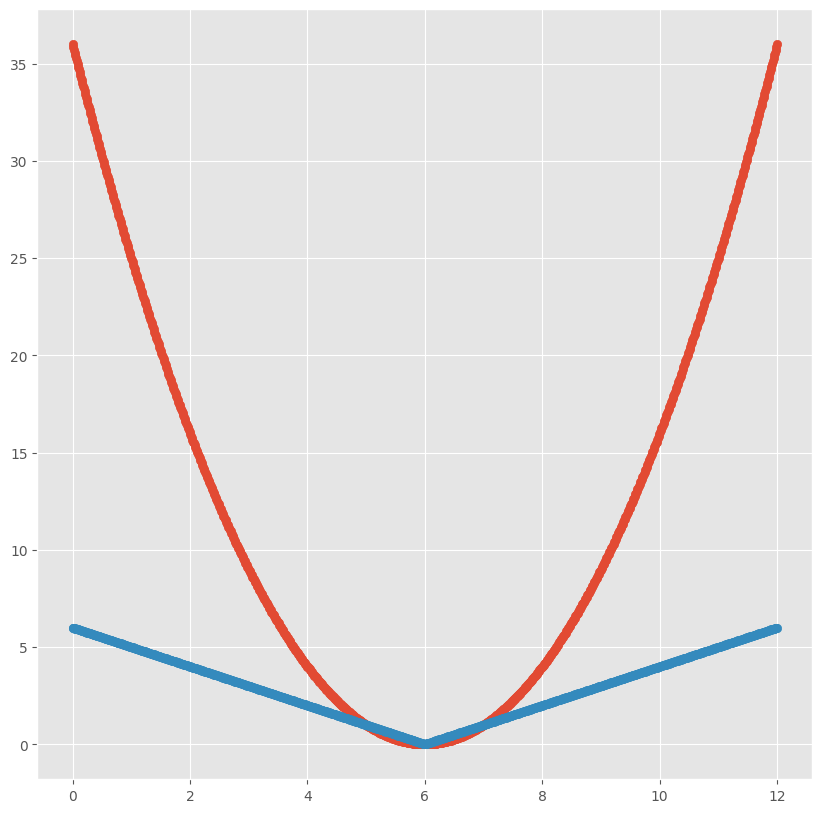

In [9]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [11]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


TypeError: Could not convert string 'ArnoldBobCassandraDonovanEmilyFabianGromHilaryIvanJohnKevinLoiusMandyNatalieOliverPatrickQuitonRobertSofiaTerryUsmanVanessaWilsonXavierYukiZayn' to numeric

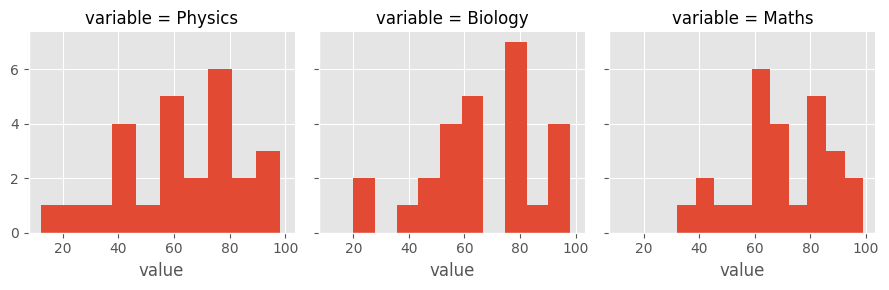

In [12]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [13]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [14]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [15]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [16]:
from scipy.stats import binom

In [17]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [18]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.3671875

In [19]:
binom.cdf(3, n=5, p=0.75)

0.3671875

In [20]:
from scipy.stats import norm

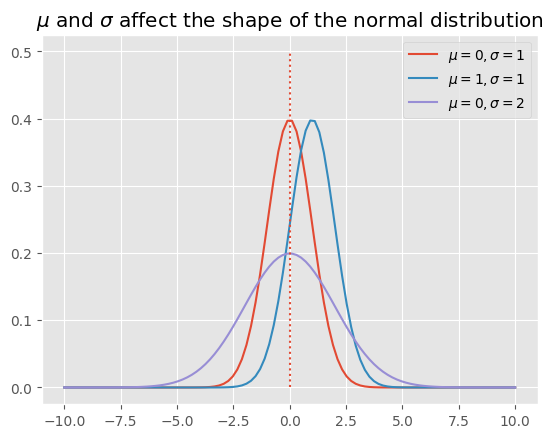

In [21]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [22]:
norm.cdf(0)

0.5

In [23]:
norm.ppf(0.5)

0.0

In [24]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [25]:
169.57 + 7.57

177.14

In [26]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [27]:
169.57 + 2 * 7.57

184.70999999999998

In [28]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [29]:
169.57 - 3 * 7.57

146.85999999999999

In [30]:
from scipy.stats import poisson

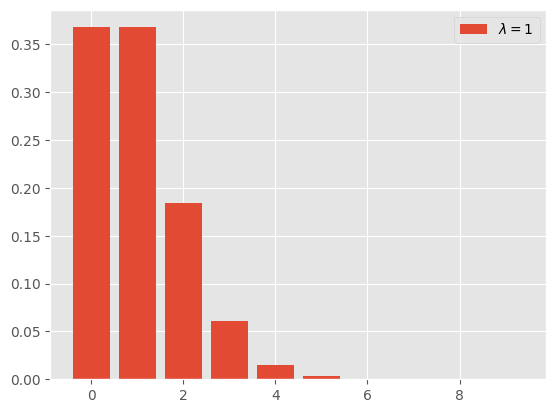

In [31]:
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [32]:
x @ f1

0.999998874797402

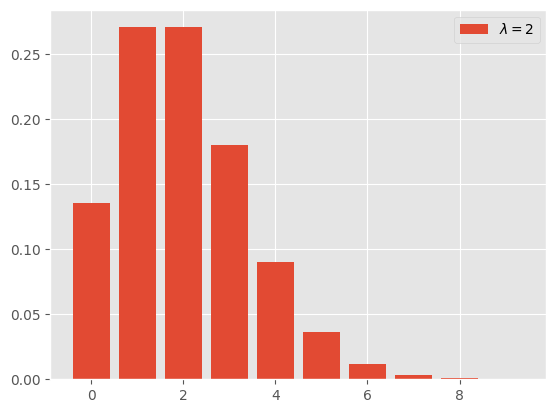

In [33]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [34]:
x @ f2

1.999525105343477

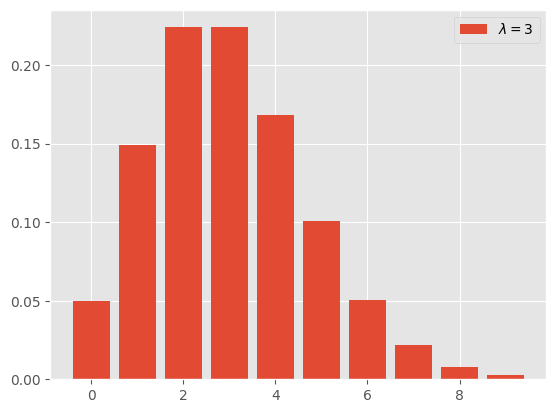

In [35]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [36]:
x @ f3

2.9885910238149727

In [37]:
poisson.pmf(3, 5)

0.1403738958142805

In [38]:
from scipy.stats import poisson

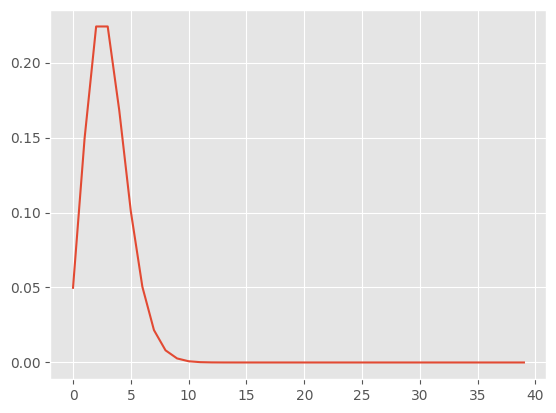

In [39]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([  6.,  32.,  55.,  67., 101.,  80.,  28.,  25.,   5.,   1.]),
 array([2.   , 2.235, 2.47 , 2.705, 2.94 , 3.175, 3.41 , 3.645, 3.88 ,
        4.115, 4.35 ]),
 <BarContainer object of 10 artists>)

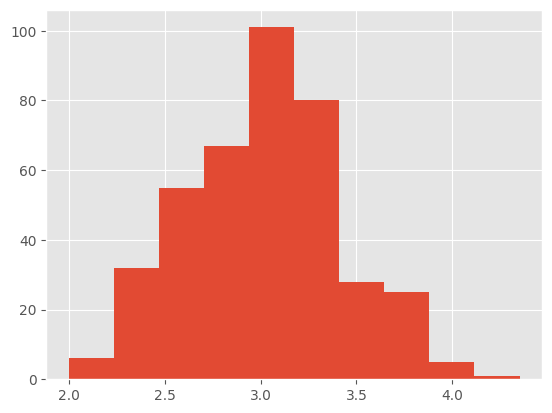

In [40]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

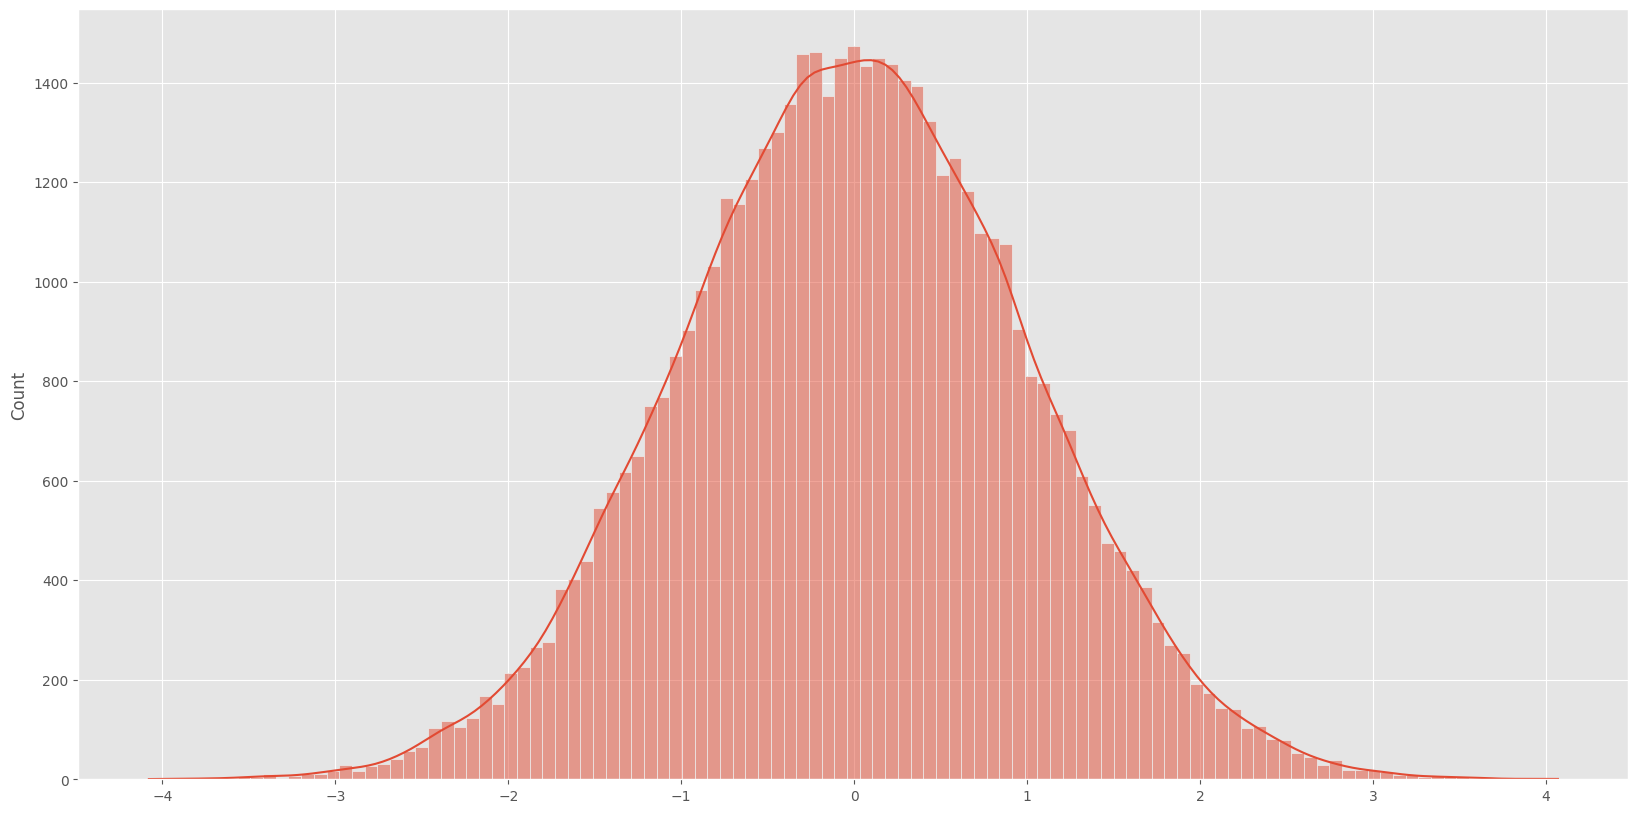

In [41]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

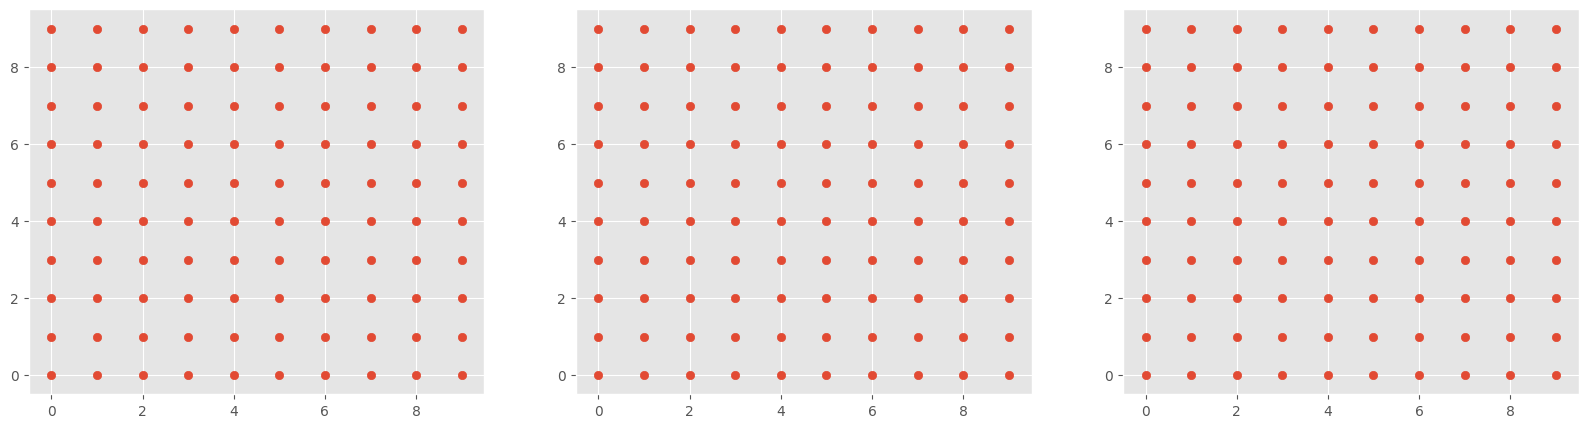

In [42]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

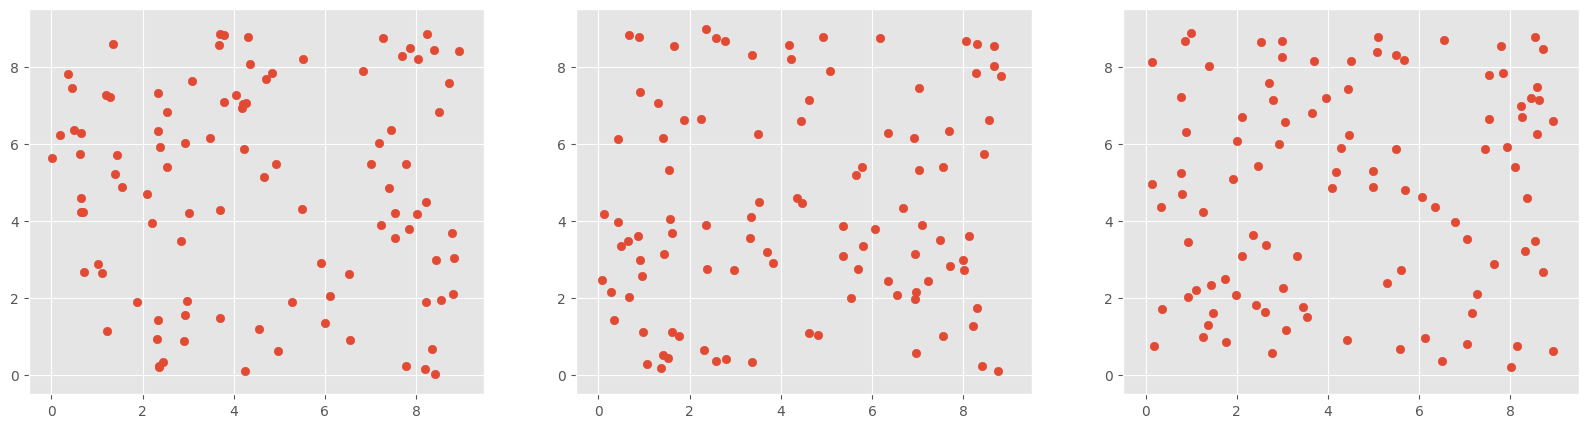

In [43]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

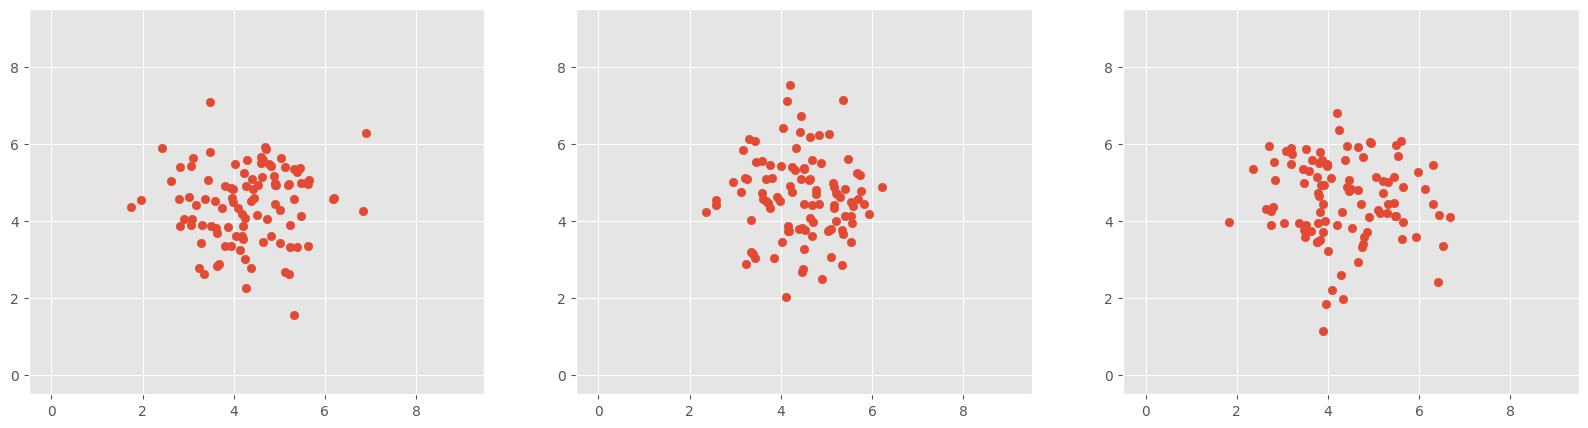

In [44]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()